## Importing libraries and Dataset

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
df = pd.DataFrame(
    data=wine.data,
    columns=wine.feature_names
)

In [5]:
df['target']=wine.target

## Data Sanity Checks

In [60]:
df.shape

(178, 14)

In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [61]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

#### No NULL values in the dataset
#### All features are numeric

In [66]:
df['target'].unique()

array([0, 1, 2])

#### Target has 3 classes

In [73]:
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

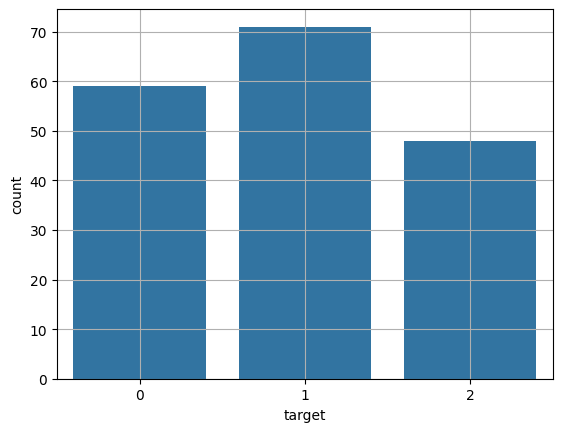

In [72]:
sns.countplot(x=df['target'])
plt.grid()
plt.show()

## Data correlation

In [67]:
df.head(1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


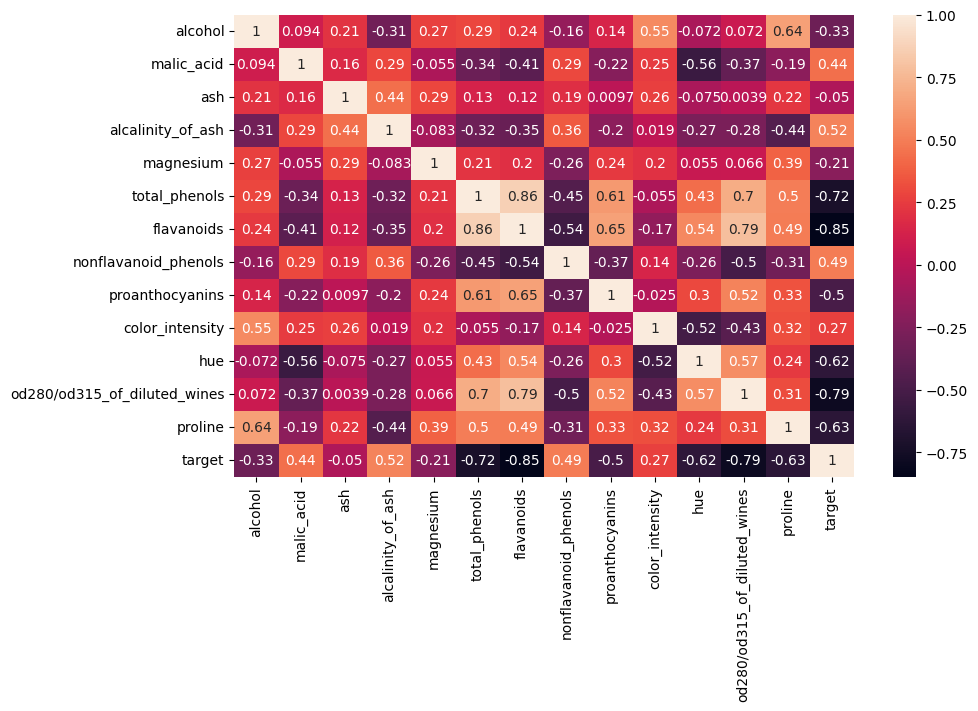

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

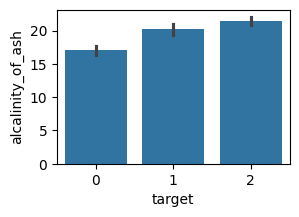

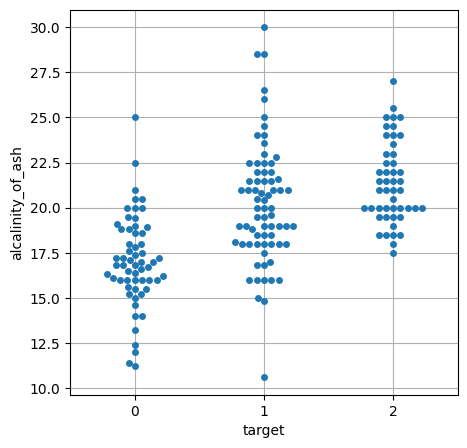

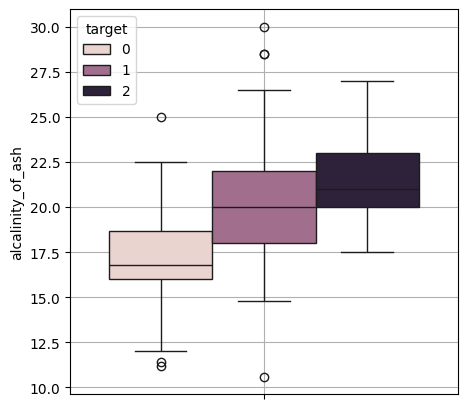

<Figure size 640x480 with 0 Axes>

In [88]:
plt.figure(figsize=(3,2))
sns.barplot(x='target', y=df['alcalinity_of_ash'], data=df)
plt.show()
plt.figure(figsize=(5,5))
sns.swarmplot(y='alcalinity_of_ash', x ='target', data=df)
plt.grid()
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(y='alcalinity_of_ash', hue='target', data=df)
plt.grid()
plt.show()
plt.tight_layout()

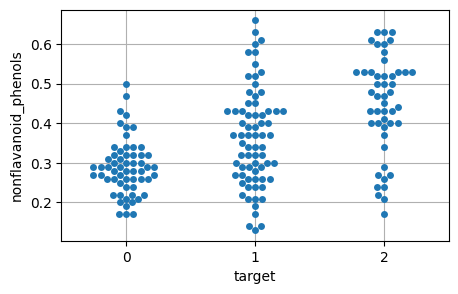

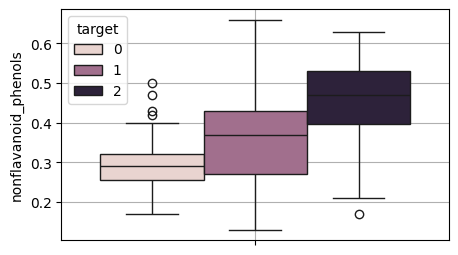

<Figure size 640x480 with 0 Axes>

In [95]:
plt.figure(figsize=(5,3))
sns.swarmplot(y='nonflavanoid_phenols', x ='target', data=df)
plt.grid()
plt.show()
plt.figure(figsize=(5,3))
sns.boxplot(y='nonflavanoid_phenols', hue='target', data=df)
plt.grid()
plt.show()
plt.tight_layout()

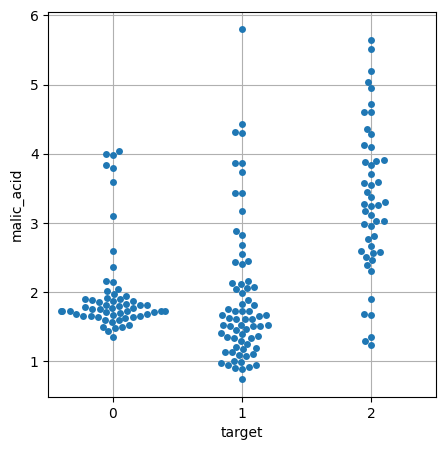

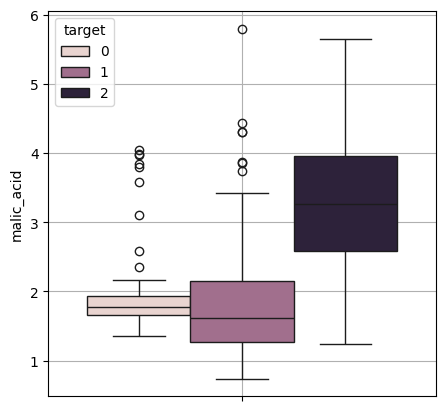

<Figure size 640x480 with 0 Axes>

In [90]:
plt.figure(figsize=(5,5))
sns.swarmplot(y='malic_acid', x ='target', data=df)
plt.grid()
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(y='malic_acid', hue='target', data=df)
plt.grid()
plt.show()
plt.tight_layout()

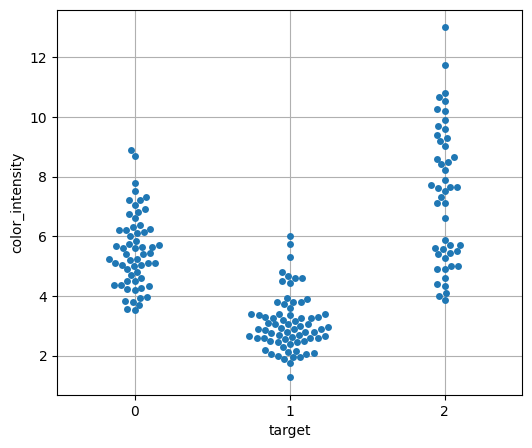

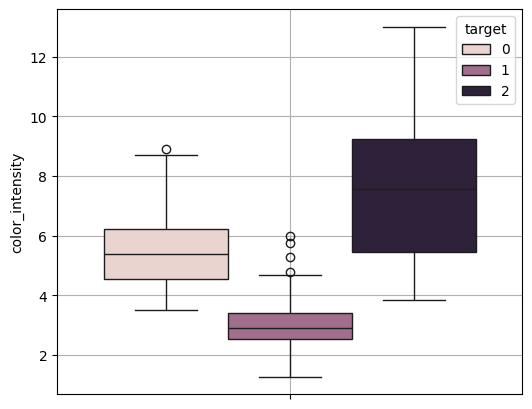

<Figure size 640x480 with 0 Axes>

In [98]:
plt.figure(figsize=(6,5))
sns.swarmplot(y='color_intensity', x ='target', data=df)
plt.grid()
plt.show()
plt.figure(figsize=(6,5))
sns.boxplot(y='color_intensity', hue='target', data=df)
plt.grid()
plt.show()
plt.tight_layout()

### Color intensity plays a major role in differenciating the wine type
#### if the intensity is between 2 to 4 it is type 1
#### is the intensity is between 4 to 6 it is type 0
#### if the intensity is more than 5 then it is type 2

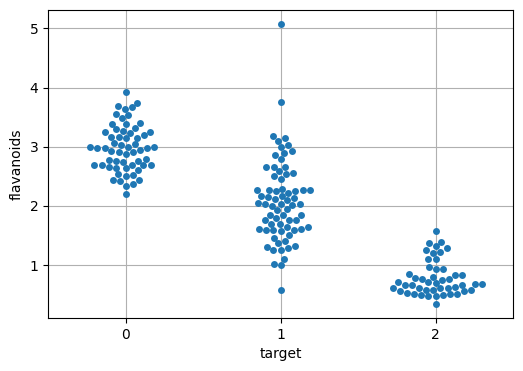

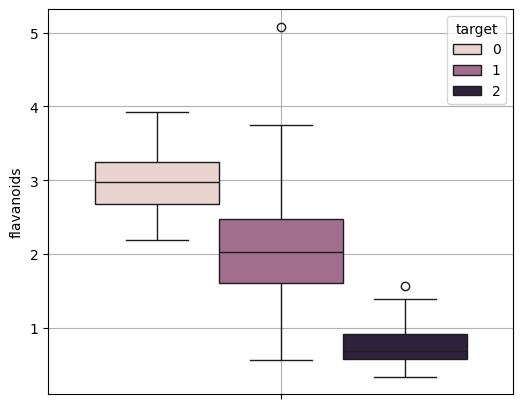

<Figure size 640x480 with 0 Axes>

In [103]:
plt.figure(figsize=(6,4))
sns.swarmplot(y='flavanoids', x ='target', data=df)
plt.grid()
plt.show()
plt.figure(figsize=(6,5))
sns.boxplot(y='flavanoids', hue='target', data=df)
plt.grid()
plt.show()
plt.tight_layout()

In [104]:
print(df.where(df['flavanoids'].between(2,4)).groupby('target')['flavanoids'].mean())
print(df.where(df['flavanoids'].between(0,2)).groupby('target')['flavanoids'].mean())

target
0.0    2.982373
1.0    2.479474
Name: flavanoids, dtype: float64
target
1.0    1.528485
2.0    0.781458
Name: flavanoids, dtype: float64


### We have an obvious inference that if the flavanoids are between 
#### 0 to 2 there's a high chance that it might be type 2 wine
#### 2 to 4 there's a high chane it might be type 0
#### 0 to 5 there's a slight chance that it might be type 1
##### 
#### 0 to 2 --> type 2
#### 2 to 4 --> type 0
#### 0 to 5 --> type 1 (overlapping types 0 and 2)

### Now that we have a significant difference between type 0 and type 2, 
### we will focus on which features contribute most to type 1

In [106]:
df.loc[df['target'].between(0,1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [107]:
df01 = df.loc[df['target'].between(0,1)]
df12 = df.loc[df['target'].between(1,2)]

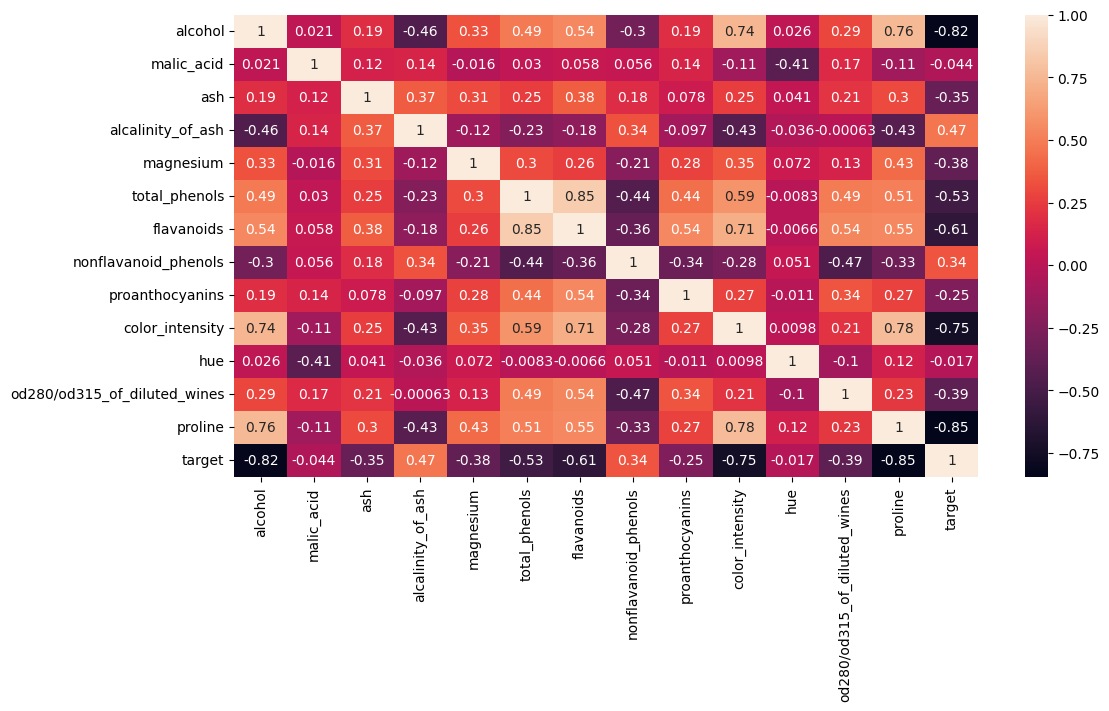

In [116]:
plt.figure(figsize=(12,6))
sns.heatmap(df01.corr(), annot=True)
plt.show()

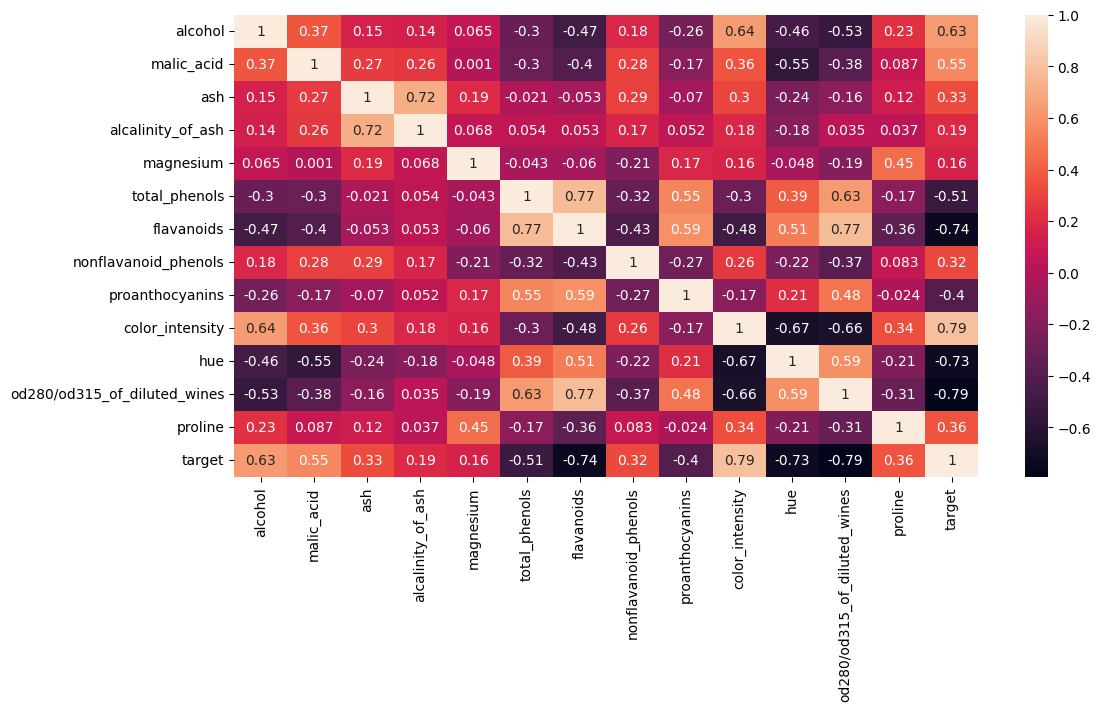

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(df12.corr(), annot=True)
plt.show()

In [118]:
df.groupby('target').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [120]:
## Type 1 --> less alcohol, less Malic acid, less magnesium, less color_instensity, less proline on average

In [122]:
df.groupby('target')[['alcohol', 'malic_acid', 'magnesium', 'color_intensity', 'proline']].mean()

,alcohol,malic_acid,magnesium,color_intensity,proline
target,,,,,
0,13.744746,2.010678,106.338983,5.528305,1115.711864
1,12.278732,1.932676,94.549296,3.086620,519.507042
2,13.153750,3.333750,99.312500,7.396250,629.895833


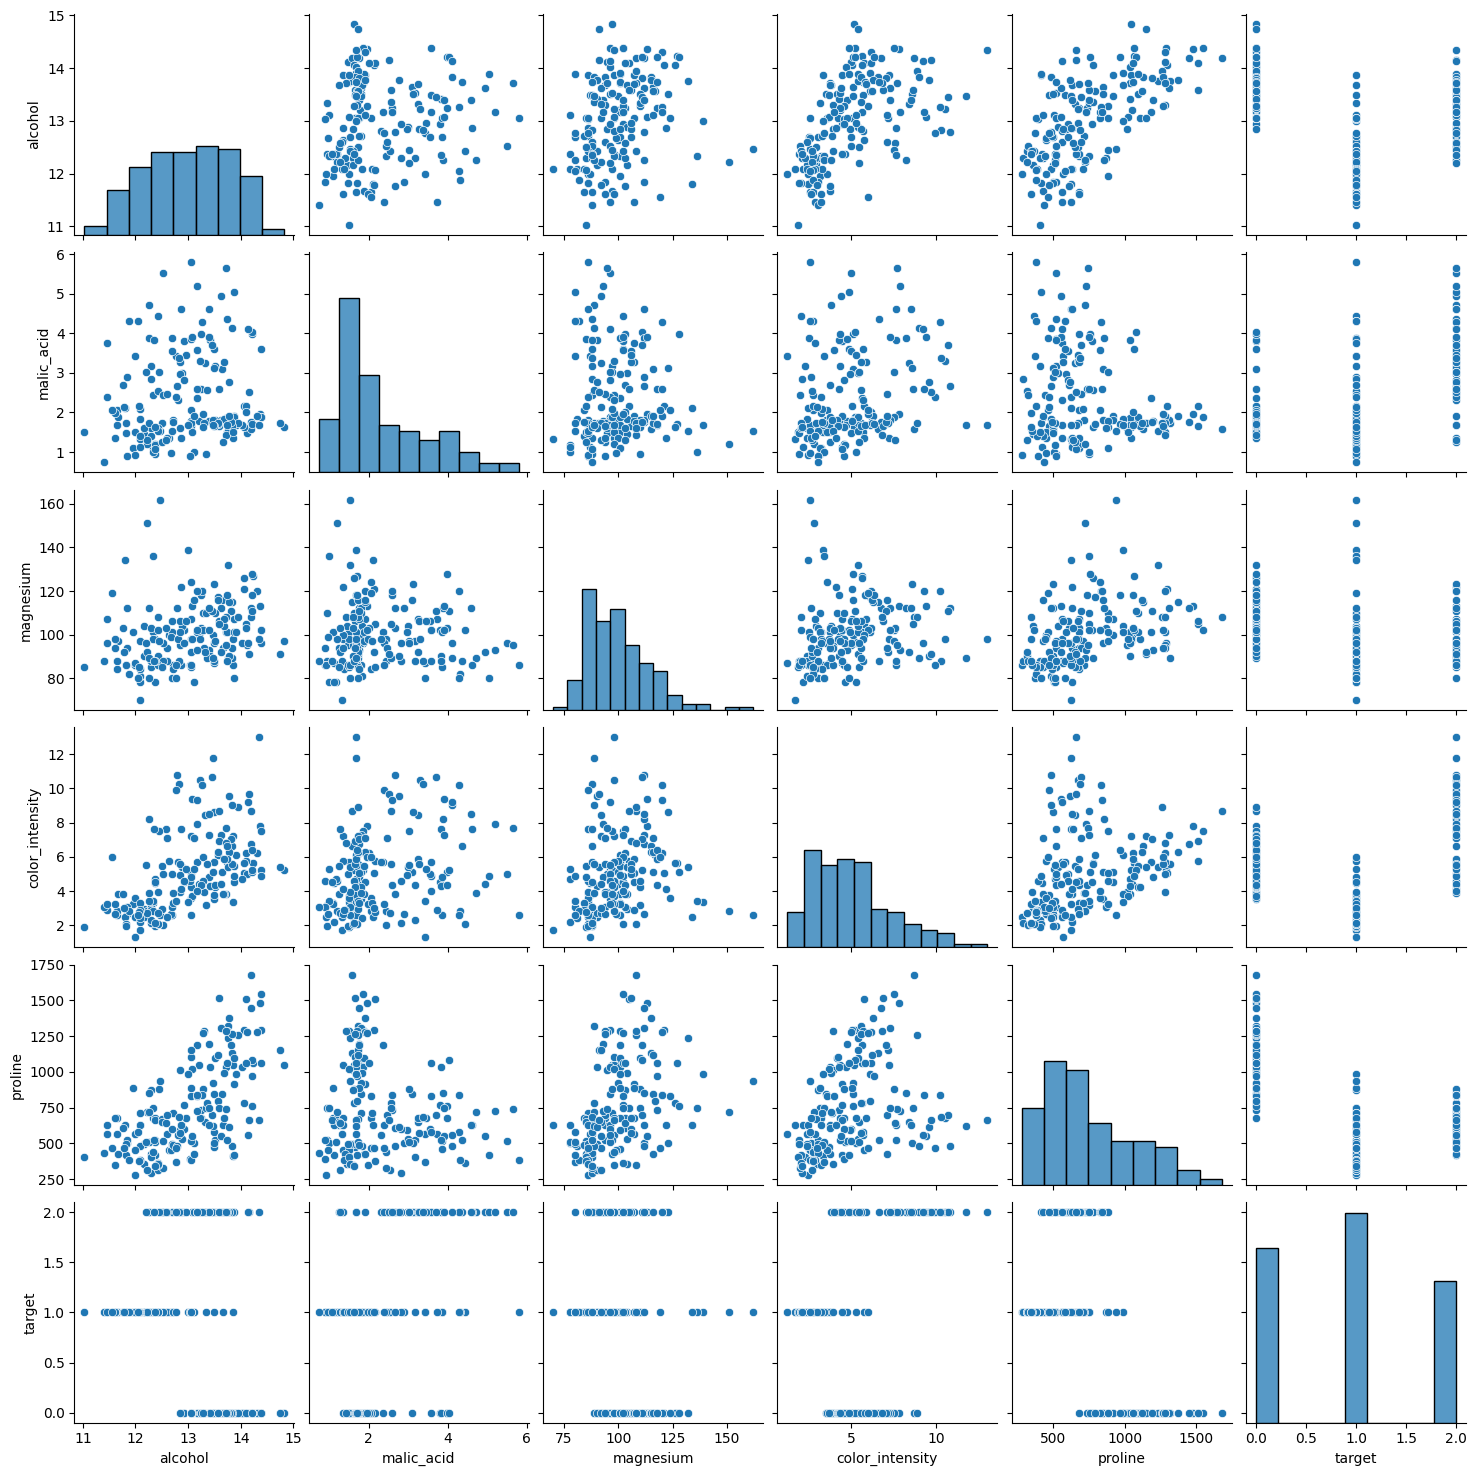

In [127]:
col = ['alcohol', 'malic_acid', 'magnesium', 'color_intensity', 'proline', 'target']
sns.pairplot(df[col])
plt.show()

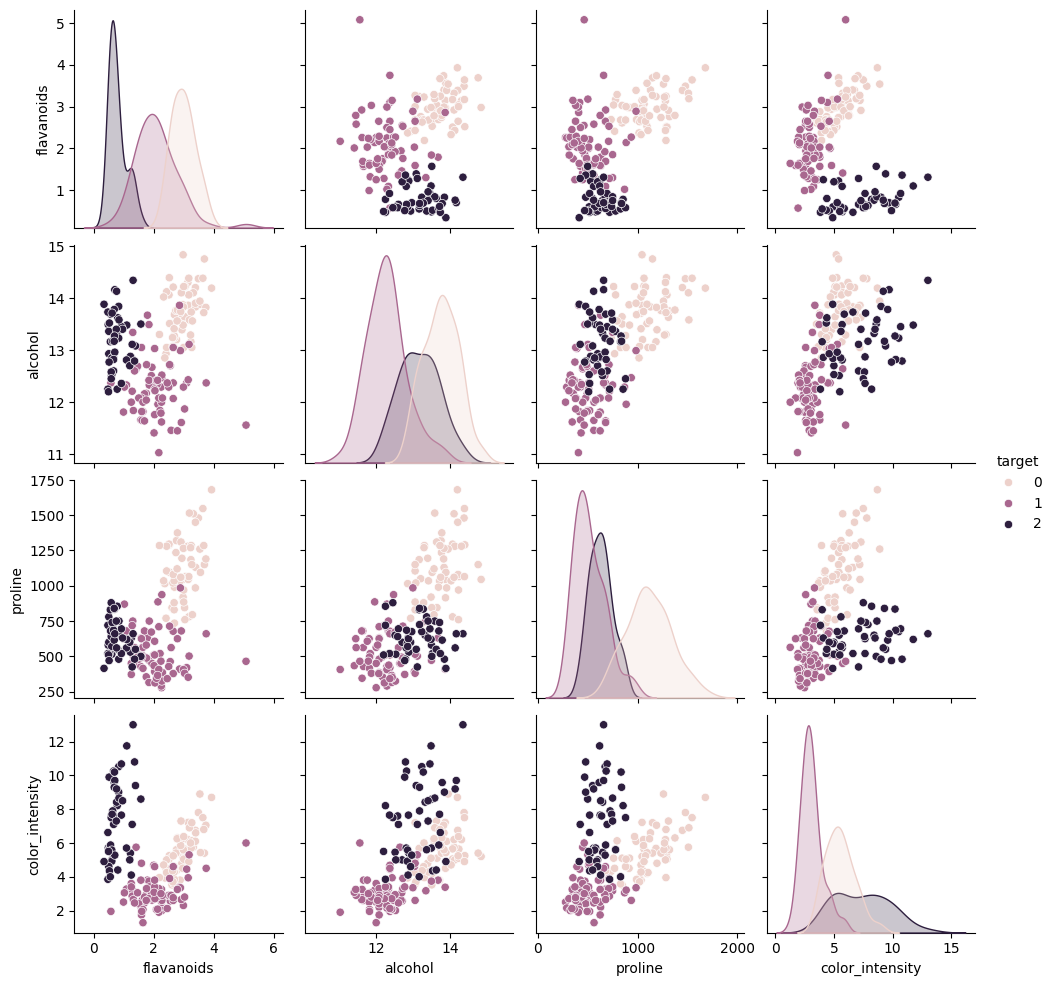

In [105]:
sns.pairplot(
    df[['flavanoids', 'alcohol', 'proline', 'color_intensity', 'target']],
    hue='target'
)

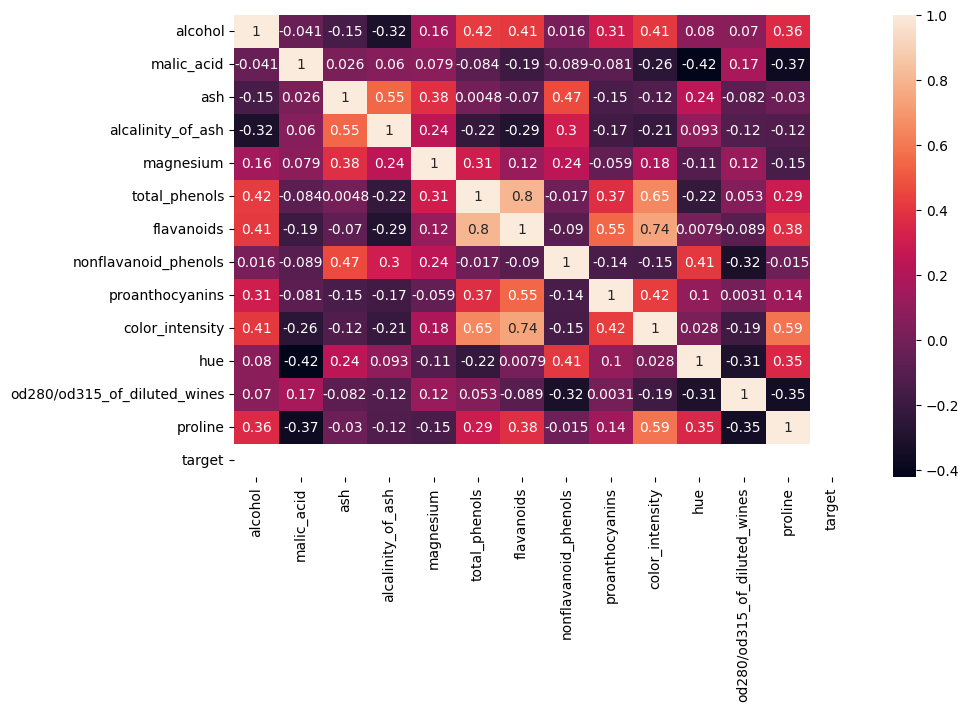

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df0.corr(), annot=True)
plt.show()

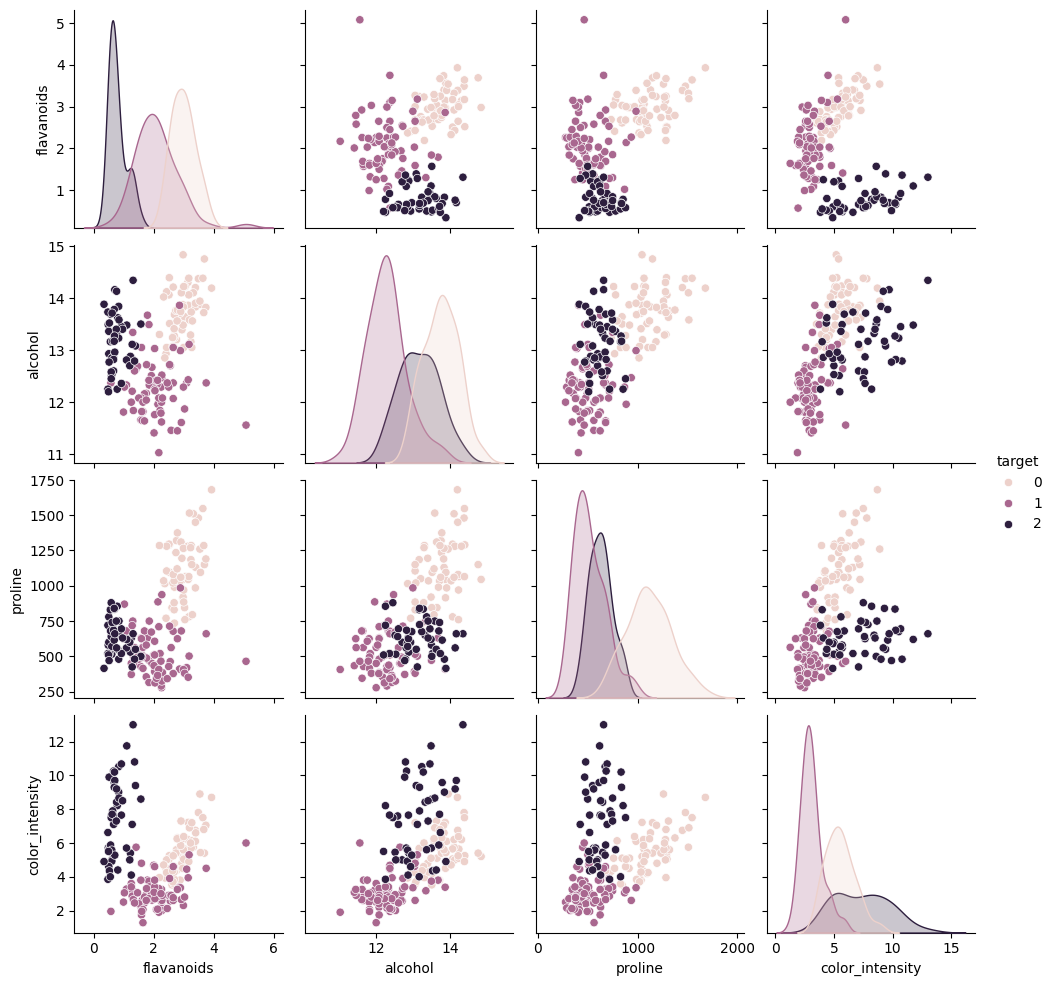

In [46]:
features = ['flavanoids', 'alcohol', 'proline', 'color_intensity']
sns.pairplot(df[features + ['target']], hue='target', diag_kind='kde')
plt.show()

### Type 1 
#### The color intensity of type 1 seems to be lower 2 to 6 whereas the other types seems to have higher color intensity
#### 

In [21]:
df.groupby('target')['color_intensity'].agg(['min','max','mean'])

,min,max,mean
target,,,
0,3.52,8.9,5.528305
1,1.28,6.0,3.086620
2,3.85,13.0,7.396250


In [22]:
df.groupby('target')['alcalinity_of_ash'].agg(['min','max','mean'])

,min,max,mean
target,,,
0,11.2,25.0,17.037288
1,10.6,30.0,20.238028
2,17.5,27.0,21.416667


In [23]:
df.groupby('target')['malic_acid'].agg(['min','max','mean'])

,min,max,mean
target,,,
0,1.35,4.04,2.010678
1,0.74,5.80,1.932676
2,1.24,5.65,3.333750


In [12]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe